## Project on Price Prediction of used cars

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [66]:
df = pd.read_csv('car_data.csv')

In [29]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


 the above data was obtained from *https://github.com/sahilrahmann/Price_prediction_of_used_Cars_-Predictive_Analysis-/blob/master/car_data.csv_*

In [5]:
# Data analysis and EDA

In [6]:
df.ndim

2

In [8]:
df.shape

(4340, 8)

In [9]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [30]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [12]:
# check the unique fuel types
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [13]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [14]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [15]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

The price of a car does depend on the fuel type also, but our fuel are not in  numerical, they are categorical

In [16]:
# create a new column of new_fuel which is the numeric form of fuel column
new_fuel = []

In [17]:
dict_fuel = {'Petrol': 0, 'Diesel': 1, 'CNG': 2,
            'LPG': 3, 'Electric': 4}

In [18]:
for fuel in df.fuel:
    new_fuel.append(dict_fuel.get(fuel))

In [19]:
new_fuel

[0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 3,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 3,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,


In [20]:
len(new_fuel)

4340

In [21]:
df.shape

(4340, 8)

In [22]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [23]:
df.insert(5, "new_fuel", new_fuel)

In [24]:
df.head()

,name,year,selling_price,km_driven,fuel,new_fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,1,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,1,Individual,Manual,Second Owner


In [25]:
df

,name,year,selling_price,km_driven,fuel,new_fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,1,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,1,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,1,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,1,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,0,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,1,Individual,Manual,First Owner


In [26]:
df.info

<bound method DataFrame.info of                                      name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel  new_fuel seller_type transmis

In [27]:
df.describe()

,year,selling_price,km_driven,new_fuel
count,4340.000000,4.340000e+03,4340.000000,4340.000000
mean,2013.090783,5.041273e+05,66215.777419,0.531336
std,4.215344,5.785487e+05,46644.102194,0.549621
min,1992.000000,2.000000e+04,1.000000,0.000000
25%,2011.000000,2.087498e+05,35000.000000,0.000000
50%,2014.000000,3.500000e+05,60000.000000,1.000000
75%,2016.000000,6.000000e+05,90000.000000,1.000000
max,2020.000000,8.900000e+06,806599.000000,4.000000


In [36]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'new_fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [35]:
df

,name,year,selling_price,km_driven,fuel,new_fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,1,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,1,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,1,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,1,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,0,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,1,Individual,Manual,First Owner


In [38]:
new_seller_type = df.seller_type.replace({'Individual': 0, 'Dealer': 1,
                                        'Trustmark Dealer': 2})

In [39]:
df.columns.get_loc('seller_type')

6

In [40]:
df.insert(df.columns.get_loc('seller_type'), "new_seller_type",
         new_seller_type)

In [41]:
df.head()

,name,year,selling_price,km_driven,fuel,new_fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,0,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,0,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,1,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,0,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,1,0,Individual,Manual,Second Owner


In [42]:
# Assuming your DataFrame is named 'df'
df = df.drop('new_fuel', axis=1)


In [43]:
df.head()

,name,year,selling_price,km_driven,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,0,Individual,Manual,Second Owner


In [44]:
new_fuel = df.fuel.replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2,
            'LPG': 3, 'Electric': 4})

In [45]:
df.insert(df.columns.get_loc('fuel'), "new_fuel", new_fuel)

In [46]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,Manual,Second Owner


In [47]:
new_df = df.copy()

In [48]:
new_df = new_df[['fuel', 'seller_type']]

In [49]:
new_df

,fuel,seller_type
0,Petrol,Individual
1,Petrol,Individual
2,Diesel,Individual
3,Petrol,Individual
4,Diesel,Individual
...,...,...
4335,Diesel,Individual
4336,Diesel,Individual
4337,Petrol,Individual
4338,Diesel,Individual


In [50]:
# if we wished to do encoding , easier way we could do
# we are using the copy here instead
new_df['fuel']

0       Petrol
1       Petrol
2       Diesel
3       Petrol
4       Diesel
         ...  
4335    Diesel
4336    Diesel
4337    Petrol
4338    Diesel
4339    Petrol
Name: fuel, Length: 4340, dtype: object

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
new_df['fuel'] = LabelEncoder().fit_transform(new_df['fuel'])

In [53]:
new_df

,fuel,seller_type
0,4,Individual
1,4,Individual
2,1,Individual
3,4,Individual
4,1,Individual
...,...,...
4335,1,Individual
4336,1,Individual
4337,4,Individual
4338,1,Individual


In [54]:
new_df.fuel.unique()

array([4, 1, 0, 3, 2])

In [55]:
# to use a one hote encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [56]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(new_df)

OneHotEncoder(handle_unknown='ignore')

In [57]:
new_df

,fuel,seller_type
0,4,Individual
1,4,Individual
2,1,Individual
3,4,Individual
4,1,Individual
...,...,...
4335,1,Individual
4336,1,Individual
4337,4,Individual
4338,1,Individual


In [58]:
enc

OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc.transform()

In [59]:
new_df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [60]:
# can also easily do it in pandas by

In [61]:
new_df_encoded = pd.get_dummies(new_df, columns=['seller_type'])

In [62]:
new_df_encoded

,fuel,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,4,0,1,0
1,4,0,1,0
2,1,0,1,0
3,4,0,1,0
4,1,0,1,0
...,...,...,...,...
4335,1,0,1,0
4336,1,0,1,0
4337,4,0,1,0
4338,1,0,1,0


In [63]:
OneHotEncoder().fit(new_df)

OneHotEncoder()

In [64]:
new_df

,fuel,seller_type
0,4,Individual
1,4,Individual
2,1,Individual
3,4,Individual
4,1,Individual
...,...,...
4335,1,Individual
4336,1,Individual
4337,4,Individual
4338,1,Individual


In [65]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,Manual,Second Owner


In [67]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [68]:
# use label encoder to encode all the values
df['fuel'] = LabelEncoder().fit_transform(df['fuel'])
df['seller_type'] = LabelEncoder().fit_transform(df['seller_type'])
df['transmission'] = LabelEncoder().fit_transform(df['transmission'])
df['owner'] = LabelEncoder().fit_transform(df['owner'])

In [69]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


the name of the car wont affect the price of car that much as compared to the others

In [70]:
# create a column to show how old the car is
# how old car is , given by : current year - year
current_year = 2024
no_of_years = [y for y in current_year - df.year]

In [71]:
no_of_years

[17,
 17,
 12,
 7,
 10,
 17,
 8,
 10,
 9,
 7,
 9,
 10,
 6,
 17,
 17,
 12,
 7,
 10,
 17,
 8,
 10,
 9,
 7,
 9,
 10,
 6,
 9,
 5,
 11,
 10,
 11,
 6,
 13,
 6,
 6,
 11,
 12,
 13,
 8,
 9,
 5,
 14,
 10,
 11,
 15,
 12,
 10,
 10,
 10,
 12,
 15,
 15,
 5,
 18,
 7,
 6,
 6,
 6,
 8,
 10,
 12,
 28,
 10,
 11,
 19,
 10,
 10,
 15,
 15,
 14,
 13,
 7,
 6,
 17,
 15,
 10,
 18,
 7,
 6,
 17,
 14,
 10,
 19,
 10,
 9,
 5,
 8,
 9,
 7,
 7,
 9,
 11,
 17,
 11,
 10,
 9,
 11,
 7,
 11,
 11,
 15,
 6,
 7,
 6,
 16,
 12,
 7,
 14,
 7,
 6,
 5,
 7,
 12,
 14,
 13,
 7,
 8,
 10,
 8,
 10,
 17,
 10,
 11,
 20,
 6,
 17,
 12,
 12,
 8,
 8,
 8,
 14,
 12,
 9,
 9,
 7,
 9,
 26,
 12,
 9,
 13,
 21,
 8,
 19,
 11,
 9,
 6,
 9,
 8,
 22,
 6,
 17,
 16,
 12,
 9,
 12,
 8,
 10,
 4,
 9,
 13,
 10,
 11,
 14,
 11,
 7,
 13,
 13,
 8,
 9,
 12,
 13,
 11,
 18,
 5,
 17,
 4,
 20,
 11,
 8,
 9,
 6,
 6,
 15,
 15,
 6,
 5,
 21,
 8,
 7,
 19,
 11,
 17,
 12,
 14,
 13,
 15,
 15,
 18,
 7,
 12,
 12,
 9,
 10,
 7,
 11,
 10,
 6,
 11,
 10,
 8,
 6,
 7,
 5,
 8,
 9,
 7,
 12,
 11

In [72]:
len(no_of_years)

4340

In [73]:
dfc = df.copy()

In [74]:
dfc.insert(df.columns.get_loc('year'), "no_of_years", no_of_years)

In [75]:
dfc

,name,no_of_years,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,17,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,17,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,12,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,7,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,10,2014,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),10,2014,409999,80000,1,1,1,2
4336,Hyundai i20 Magna 1.4 CRDi,10,2014,409999,80000,1,1,1,2
4337,Maruti 800 AC BSIII,15,2009,110000,83000,4,1,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,8,2016,865000,90000,1,1,1,0


In [76]:
df['no_of_years'] = no_of_years

In [77]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,17
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,17
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,12
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,7
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,10
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,1,1,2,10
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,1,1,2,10
4337,Maruti 800 AC BSIII,2009,110000,83000,4,1,1,2,15
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,1,1,0,8


In [78]:
# drop the columns: name and year
dfc.drop(columns=['name', 'year'], inplace=True)

In [79]:
dfc

,no_of_years,selling_price,km_driven,fuel,seller_type,transmission,owner
0,17,60000,70000,4,1,1,0
1,17,135000,50000,4,1,1,0
2,12,600000,100000,1,1,1,0
3,7,250000,46000,4,1,1,0
4,10,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...
4335,10,409999,80000,1,1,1,2
4336,10,409999,80000,1,1,1,2
4337,15,110000,83000,4,1,1,2
4338,8,865000,90000,1,1,1,0


In [80]:
dfc.rename(columns={'selling_price': 'current_price'}, inplace=True)


In [81]:
dfc

,no_of_years,current_price,km_driven,fuel,seller_type,transmission,owner
0,17,60000,70000,4,1,1,0
1,17,135000,50000,4,1,1,0
2,12,600000,100000,1,1,1,0
3,7,250000,46000,4,1,1,0
4,10,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...
4335,10,409999,80000,1,1,1,2
4336,10,409999,80000,1,1,1,2
4337,15,110000,83000,4,1,1,2
4338,8,865000,90000,1,1,1,0


In [82]:
df.drop(columns=['name','year'], inplace=True)

In [83]:
df.rename(columns={'selling_price': 'current_selling_price'}, inplace=True)

In [84]:
df

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,60000,70000,4,1,1,0,17
1,135000,50000,4,1,1,0,17
2,600000,100000,1,1,1,0,12
3,250000,46000,4,1,1,0,7
4,450000,141000,1,1,1,2,10
...,...,...,...,...,...,...,...
4335,409999,80000,1,1,1,2,10
4336,409999,80000,1,1,1,2,10
4337,110000,83000,4,1,1,2,15
4338,865000,90000,1,1,1,0,8


In [85]:
# the correlation
df.corr()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
current_selling_price,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,0.419688
fuel,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,0.120002
seller_type,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,0.098352
transmission,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,0.414705
no_of_years,-0.413922,0.419688,0.120002,0.098352,0.143800,0.414705,1.000000


<AxesSubplot:>

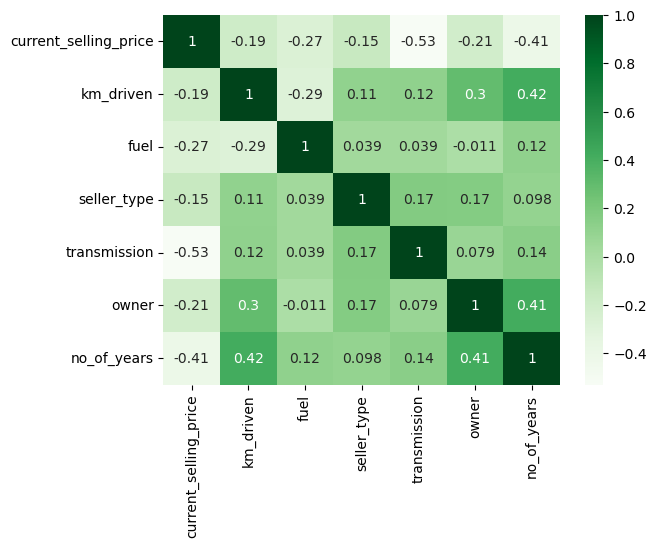

In [86]:
# heatmap
sns.heatmap(df.corr(), annot=True, cmap='Greens')

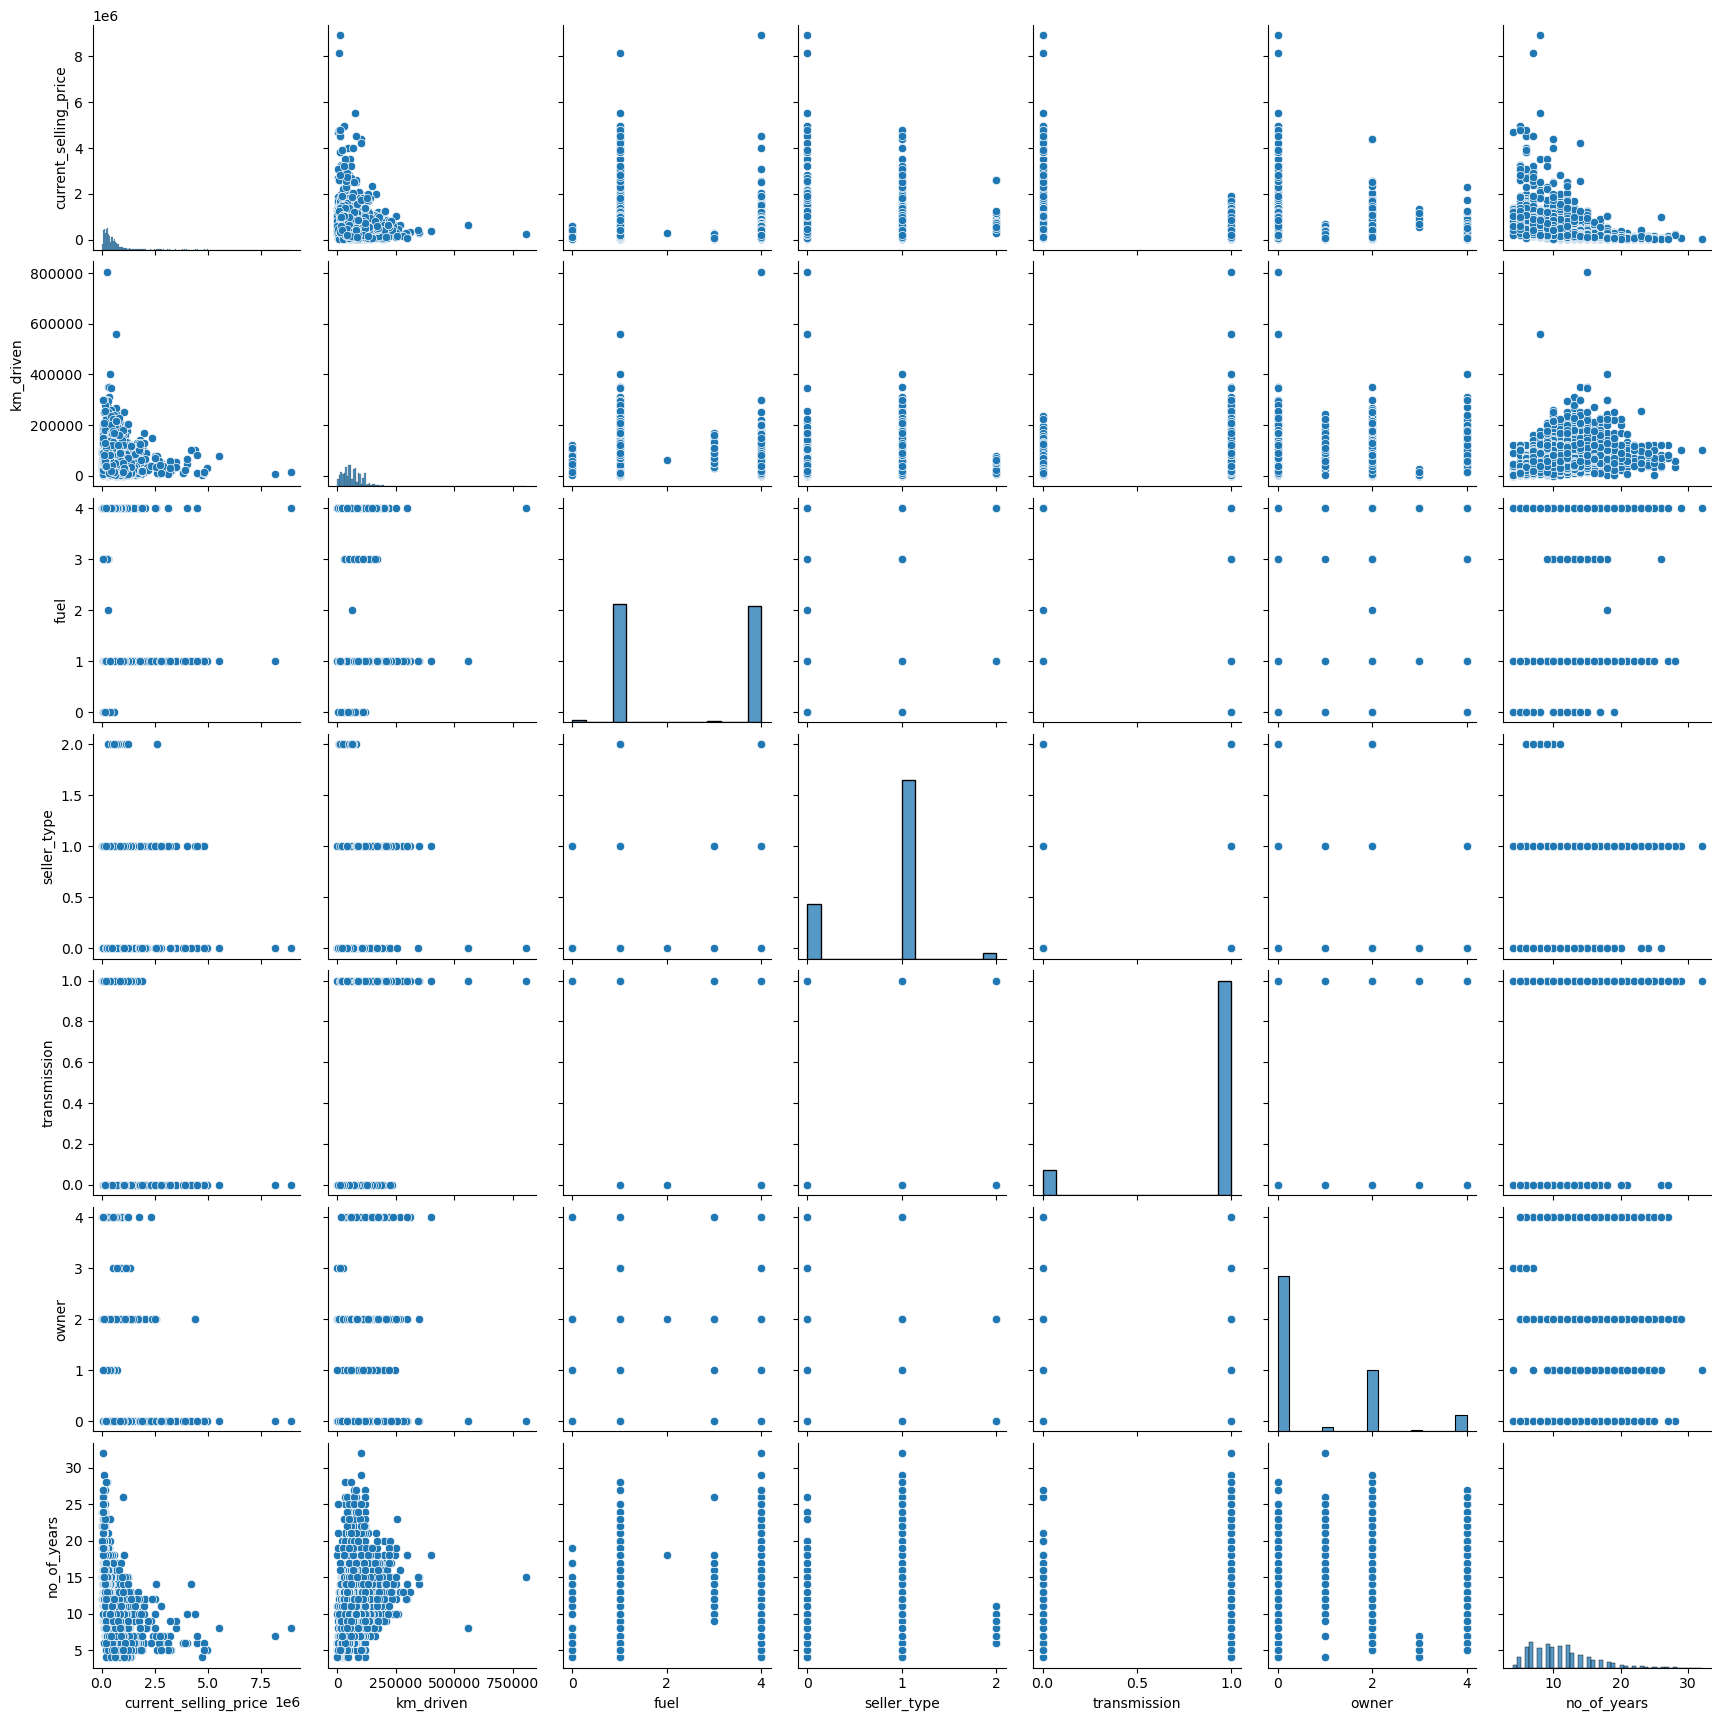

In [87]:
# pairplot
sns.pairplot(df)

therefore we can conclude there's no any positive relation

<AxesSubplot:>

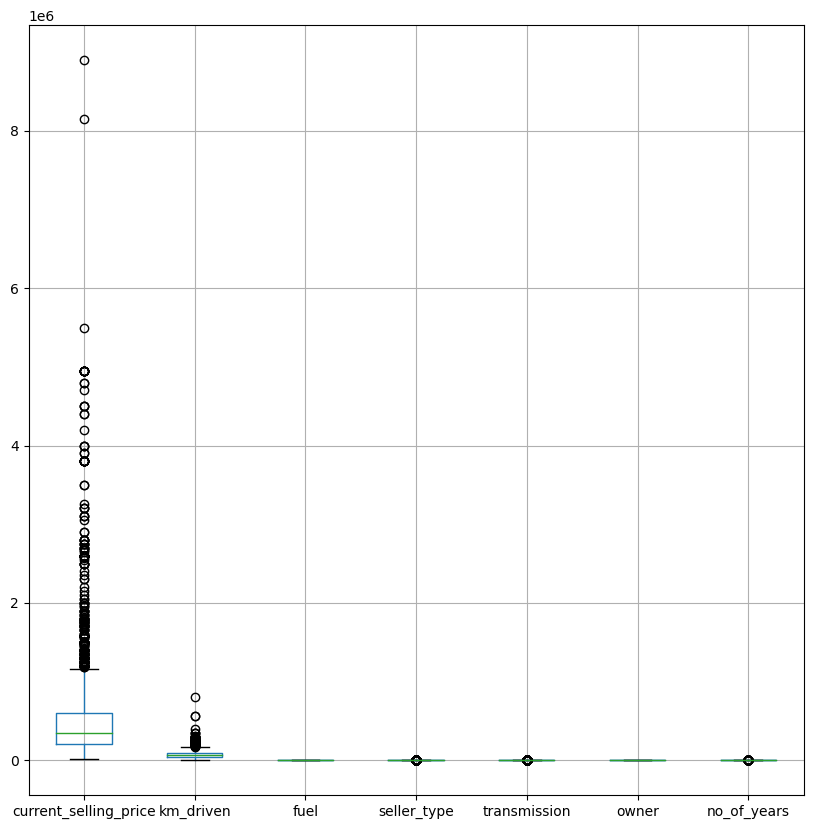

In [88]:
plt.figure(figsize=(10, 10))
df.boxplot()

a lot of outliers in current_selliing_price and km_driven

In [89]:
# features and targets
x = np.array(df.drop('current_selling_price', axis=1)) 
y = np.array(df.current_selling_price)

In [90]:
x

array([[ 70000,      4,      1,      1,      0,     17],
       [ 50000,      4,      1,      1,      0,     17],
       [100000,      1,      1,      1,      0,     12],
       ...,
       [ 83000,      4,      1,      1,      2,     15],
       [ 90000,      1,      1,      1,      0,      8],
       [ 40000,      4,      1,      1,      0,      8]], dtype=int64)

In [91]:
y

array([ 60000, 135000, 600000, ..., 110000, 865000, 225000], dtype=int64)

In [92]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [93]:
len(x_train), len(y_train)

(3472, 3472)

In [94]:
# choosing the model
regressor = DecisionTreeRegressor()

In [108]:
# train the model
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [98]:
# test the model
y_pred = regressor.predict(x_test)

In [106]:
target = pd.DataFrame({'Actual': y_test.reshape(-1), 'Predicted': y_pred.reshape(-1)})

In [104]:
target

,Actual,Predicted
0,600000,630000.000000
1,515000,545833.333333
2,434999,280000.000000
3,495000,470000.000000
4,65000,35000.000000
...,...,...
863,250000,161600.000000
864,900000,312500.000000
865,459999,470000.000000
866,135000,135000.000000


ValueError: x and y must be the same size

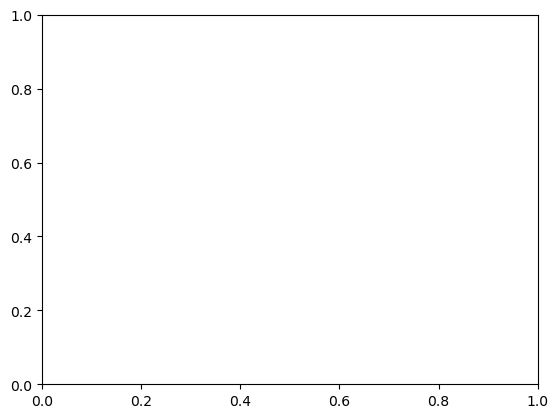

In [110]:
# plot them
plt.scatter(x_test.reshape(-1, 1), y_test, color='red')
plt.scatter(x_test.reshape(-1, 1), y_pred, color='green')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual values Vs predicted")

<AxesSubplot:>

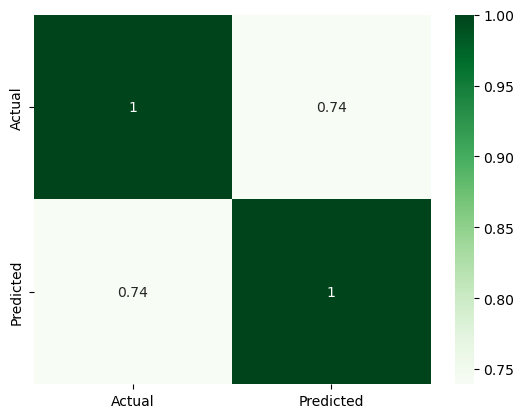

In [111]:
sns.heatmap(target.corr(), annot=True, cmap='Greens')

In [112]:
r2_score(y_test, y_pred)

0.5019272231858889

This a relatively bad accuracy, which can be improved by hyper-parameter tuning